In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow
import cmcrameri.cm as cmcm

In [3]:
spectrum_sav = scipy.io.readsav("../../save/spectrum/noti_chianti10/spectrum_pch_2063_sumer_window_3_noti_chianti10.sav")
syn_spec = spectrum_sav["w"][:,0,:]
wvl = spectrum_sav["x"][0,0,0,:]
y_coord = spectrum_sav["x"][2,:,0,0]

In [4]:
print(y_coord[6:10])

[1.00999999 1.01999999 1.03       1.04      ]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  del sys.path[0]


/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


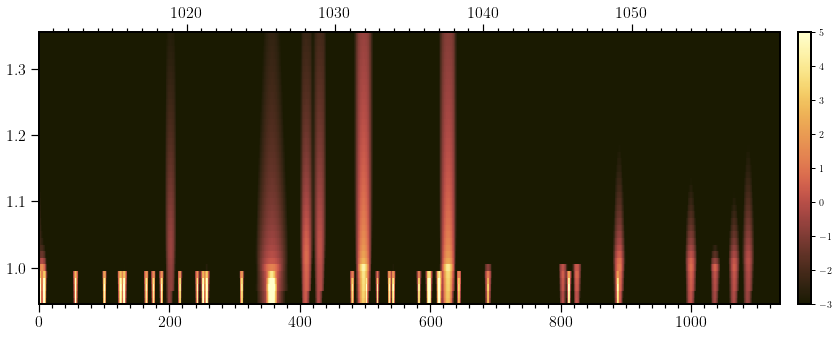

In [5]:
fig, ax = plt.subplots(figsize=(16,5))
map = ax.pcolormesh(np.arange(syn_spec.shape[1]),y_coord,np.nan_to_num(np.log10(syn_spec),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-3,vmax=5)

ax_wvl = ax.twiny()
ax_wvl.set_xlim(wvl[0],wvl[-1])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
for ax_ in (ax, ax_wvl):
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1.2,length=8)
    ax_.tick_params(which="minor",width=1.2,length=4)
plt.colorbar(map,pad=0.02)

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{x} 1028 \\mbox{\\AA}}'}, ylabel='Intensity $\\mathrm{[erg \\cdot s^{-1} \\cdot cm^{-2} \\cdot \\AA^{-1} sr^{-1}]}$'>

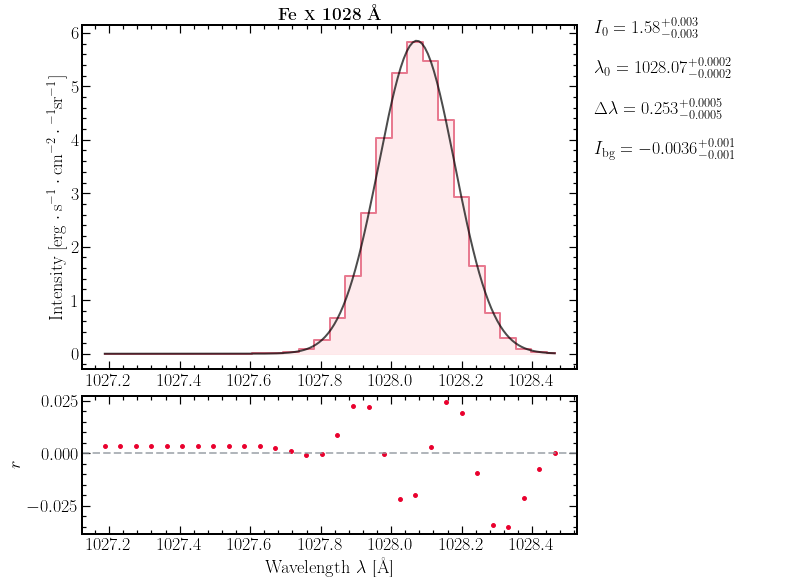

In [9]:
FeX_1028_slice = (390,420)
wvl_FeX_1028 = wvl[FeX_1028_slice[0]:FeX_1028_slice[1]]
int_FeX_1028 = np.average(syn_spec[6:9,FeX_1028_slice[0]:FeX_1028_slice[1]],axis=0)

FeX_1028_fit_model = SpectrumFitSingle(data=int_FeX_1028,wvl=wvl_FeX_1028,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1028.1],
                                      int_max_init=[6],fwhm_init=[0.2])
# FeX_1028_fit_model.plot(plot_fit=False,plot_params=False)
FeX_1028_fit_model.run_HahnMC(n_chain=10000)
FeX_1028_fit_model.plot(plot_title=r"\textbf{Fe \textsc{x} 1028 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<AxesSubplot:title={'center':'\\textbf{Fe \\textsc{xi} 1029 \\mbox{\\AA}}'}, ylabel='Intensity $\\mathrm{[erg \\cdot s^{-1} \\cdot cm^{-2} \\cdot \\AA^{-1} sr^{-1}]}$'>

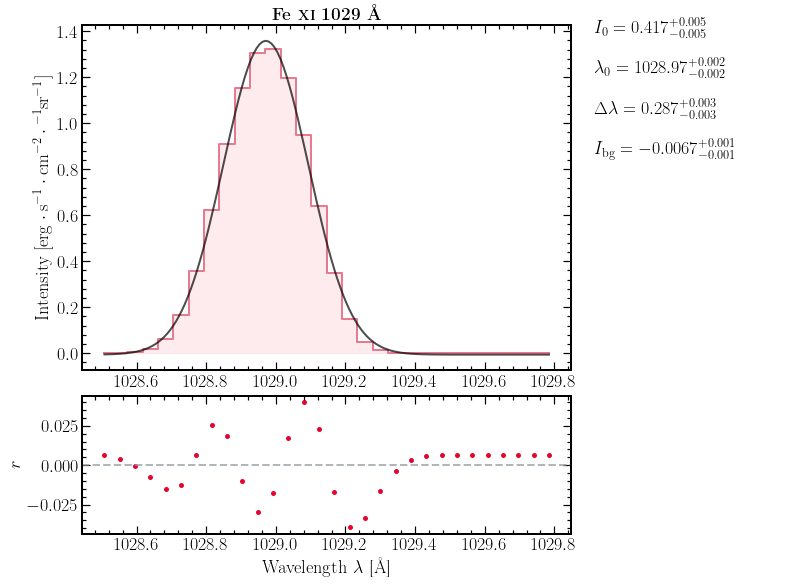

In [12]:
FeXI_1029_slice = (420,450)
wvl_FeXI_1029 = wvl[FeXI_1029_slice[0]:FeXI_1029_slice[1]]
int_FeXI_1029 = np.average(syn_spec[6:9,FeXI_1029_slice[0]:FeXI_1029_slice[1]],axis=0)

FeXI_1029_fit_model = SpectrumFitSingle(data=int_FeXI_1029,wvl=wvl_FeXI_1029,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1029.0],
                                      int_max_init=[6],fwhm_init=[0.2])
# FeXI_1029_fit_model.plot(plot_fit=False,plot_params=False)
FeXI_1029_fit_model.run_HahnMC(n_chain=10000)
FeXI_1029_fit_model.plot(plot_title=r"\textbf{Fe \textsc{xi} 1029 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<AxesSubplot:title={'center':'\\textbf{O \\textsc{vi} 1032 \\mbox{\\AA}}'}, ylabel='Intensity $\\mathrm{[erg \\cdot s^{-1} \\cdot cm^{-2} \\cdot \\AA^{-1} sr^{-1}]}$'>

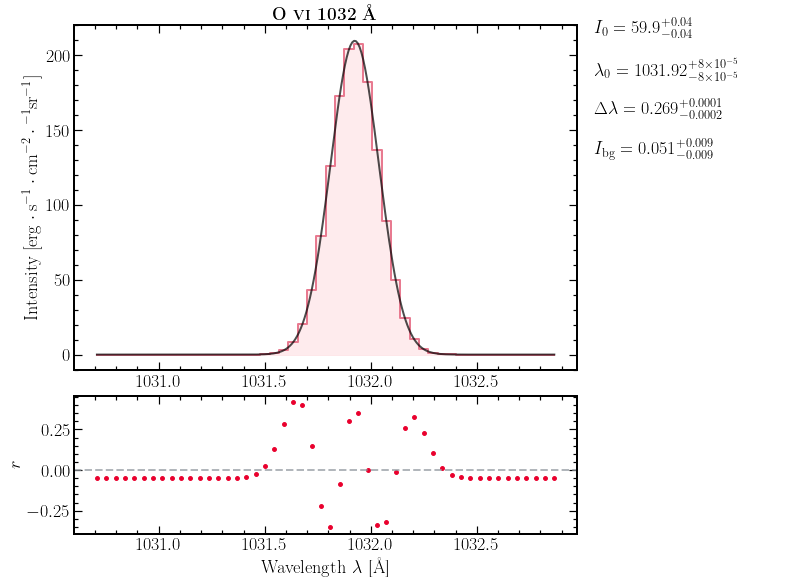

In [14]:
OVI_1032_slice = (470,520)
wvl_OVI_1032 = wvl[OVI_1032_slice[0]:OVI_1032_slice[1]]
int_OVI_1032 = np.average(syn_spec[6:9,OVI_1032_slice[0]:OVI_1032_slice[1]],axis=0)

OVI_1032_fit_model = SpectrumFitSingle(data=int_OVI_1032,wvl=wvl_OVI_1032,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1032.0],
                                      int_max_init=[600],fwhm_init=[0.2])
# OVI_1032_fit_model.plot(plot_fit=False,plot_params=False)
OVI_1032_fit_model.run_HahnMC(n_chain=10000)
OVI_1032_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1032 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
No handles with labels found to put in legend.


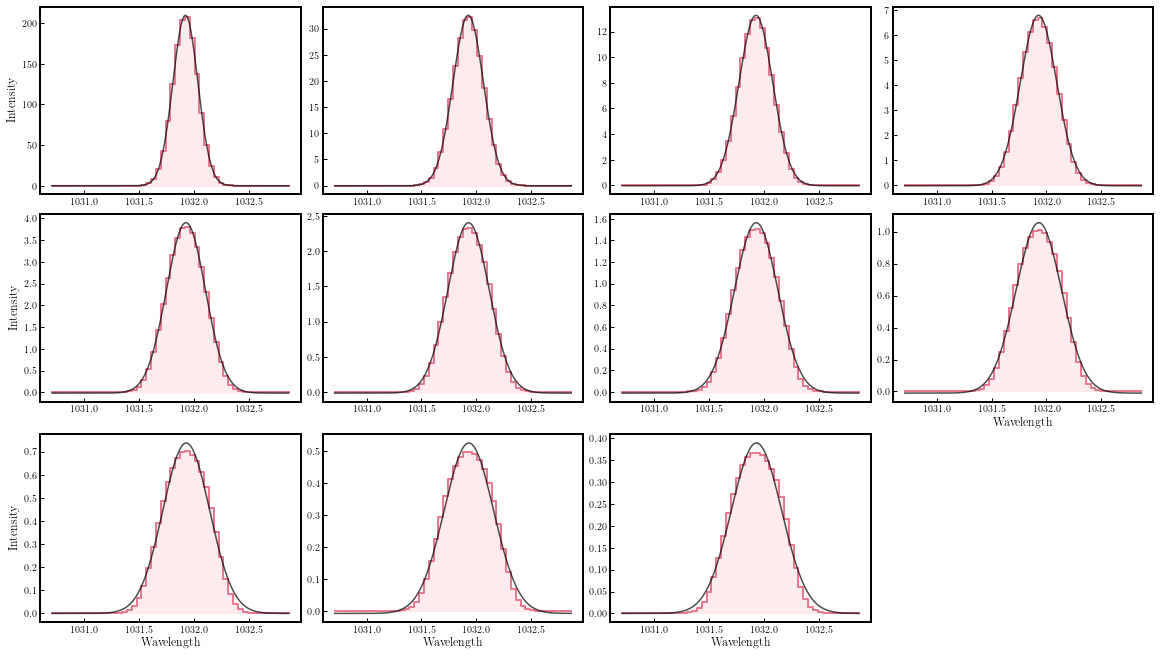

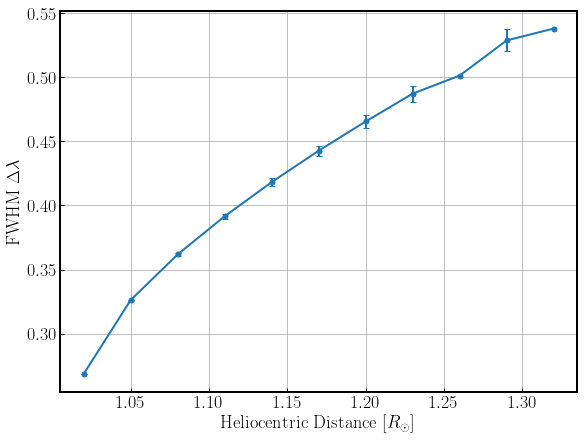

In [15]:

int_OVI_1032_row = np.average(syn_spec[6:39,OVI_1032_slice[0]:OVI_1032_slice[1]].reshape(-1,3,OVI_1032_slice[1]-OVI_1032_slice[0]),axis=1)
OVI_1032_fit_row_model = SpectrumFitRow(data=int_OVI_1032_row,wvl=wvl_OVI_1032,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1032.0],
                                      int_max_init=[600],fwhm_init=[0.3])
OVI_1032_fit_row_model.run_lse()
OVI_1032_fit_row_model.plot_fit()
ax = OVI_1032_fit_row_model.plot_variation(xdata=np.average(y_coord[6:39].reshape(-1,3),axis=1),
                                            xlabel=r"Heliocentric Distance $\left[R_\odot \right]$")
ax.grid("on")


/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<AxesSubplot:title={'center':'\\textbf{O \\textsc{vi} 1037 \\mbox{\\AA}}'}, ylabel='Intensity $\\mathrm{[erg \\cdot s^{-1} \\cdot cm^{-2} \\cdot \\AA^{-1} sr^{-1}]}$'>

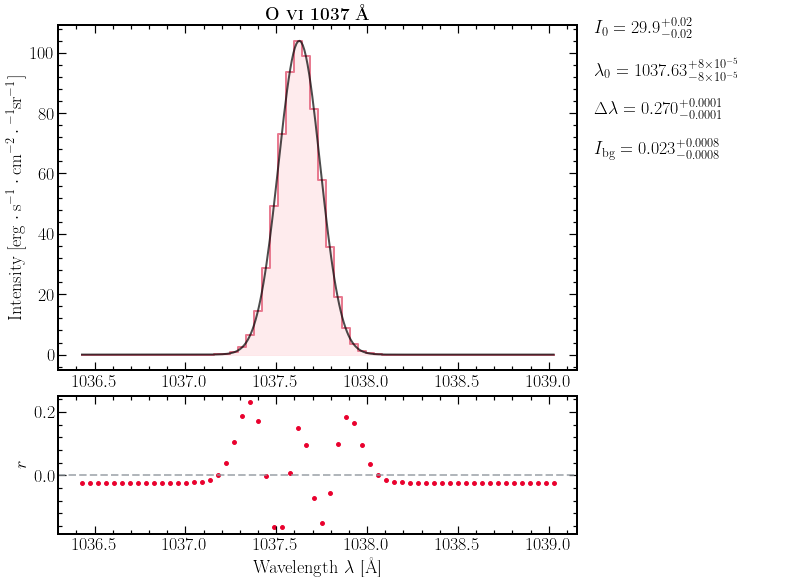

In [18]:
OVI_1037_slice = (600,660)
wvl_OVI_1037 = wvl[OVI_1037_slice[0]:OVI_1037_slice[1]]
int_OVI_1037 = np.average(syn_spec[6:9,OVI_1037_slice[0]:OVI_1037_slice[1]],axis=0)

OVI_1037_fit_model = SpectrumFitSingle(data=int_OVI_1037,wvl=wvl_OVI_1037,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1037.55],
                                      int_max_init=[600],fwhm_init=[0.2])
# OVI_1037_fit_model.plot(plot_fit=False,plot_params=False)
OVI_1037_fit_model.run_HahnMC(n_chain=10000)
OVI_1037_fit_model.plot(plot_title=r"\textbf{O \textsc{vi} 1037 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
No handles with labels found to put in legend.


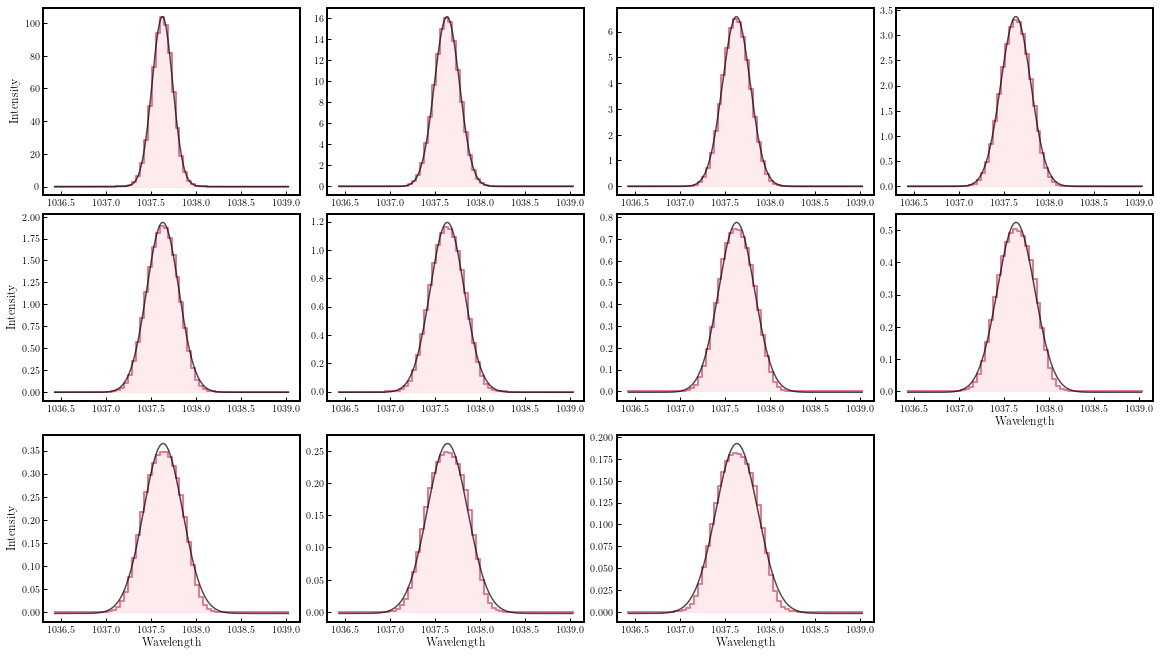

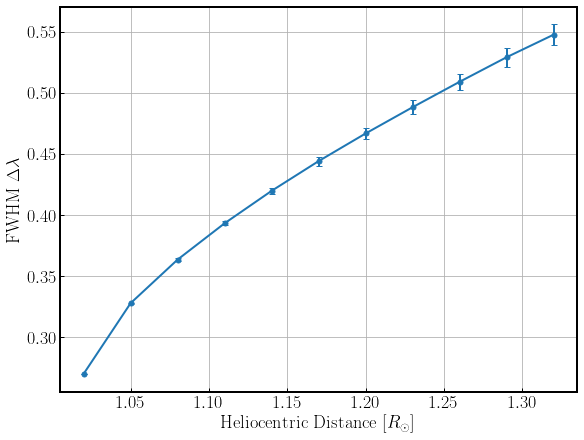

In [19]:

int_OVI_1037_row = np.average(syn_spec[6:39,OVI_1037_slice[0]:OVI_1037_slice[1]].reshape(-1,3,OVI_1037_slice[1]-OVI_1037_slice[0]),axis=1)
OVI_1037_fit_row_model = SpectrumFitRow(data=int_OVI_1037_row,wvl=wvl_OVI_1037,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1037.55],
                                      int_max_init=[600],fwhm_init=[0.2])
OVI_1037_fit_row_model.run_lse()
OVI_1037_fit_row_model.plot_fit()
ax = OVI_1037_fit_row_model.plot_variation(xdata=np.average(y_coord[6:39].reshape(-1,3),axis=1),
                                            xlabel=r"Heliocentric Distance $\left[R_\odot \right]$")
ax.grid("on")


/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<AxesSubplot:title={'center':'\\textbf{Si \\textsc{vi} 1049 \\mbox{\\AA}}'}, ylabel='Intensity $\\mathrm{[erg \\cdot s^{-1} \\cdot cm^{-2} \\cdot \\AA^{-1} sr^{-1}]}$'>

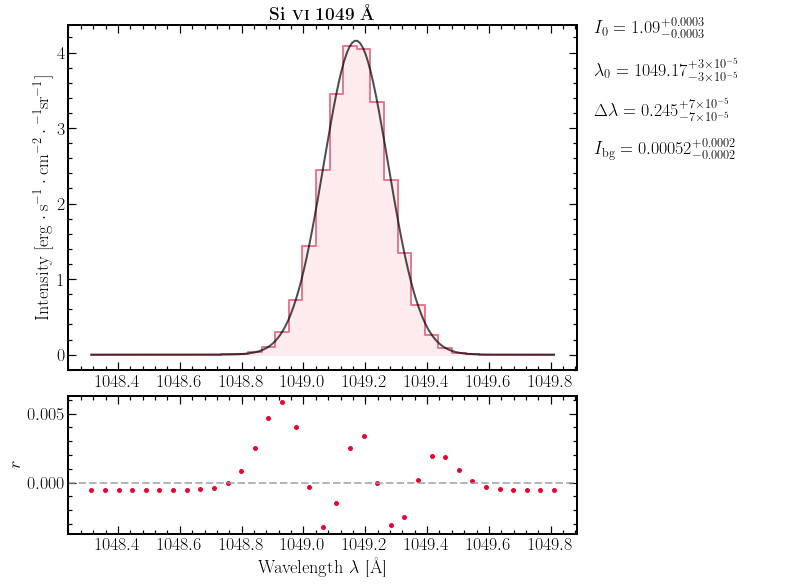

In [21]:
SiVII_1049_slice = (870,905)
wvl_SiVII_1049 = wvl[SiVII_1049_slice[0]:SiVII_1049_slice[1]]
int_SiVII_1049 = np.average(syn_spec[6:9,SiVII_1049_slice[0]:SiVII_1049_slice[1]],axis=0)

SiVII_1049_fit_model = SpectrumFitSingle(data=int_SiVII_1049,wvl=wvl_SiVII_1049,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1049.25],
                                      int_max_init=[5],fwhm_init=[0.2])
# SiVII_1049_fit_model.plot(plot_fit=False,plot_params=False)
SiVII_1049_fit_model.run_HahnMC(n_chain=10000)
SiVII_1049_fit_model.plot(plot_title=r"\textbf{Si \textsc{vi} 1049 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:196: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")


<AxesSubplot:title={'center':'\\textbf{Al \\textsc{vii} 1054 \\mbox{\\AA}}'}, ylabel='Intensity $\\mathrm{[erg \\cdot s^{-1} \\cdot cm^{-2} \\cdot \\AA^{-1} sr^{-1}]}$'>

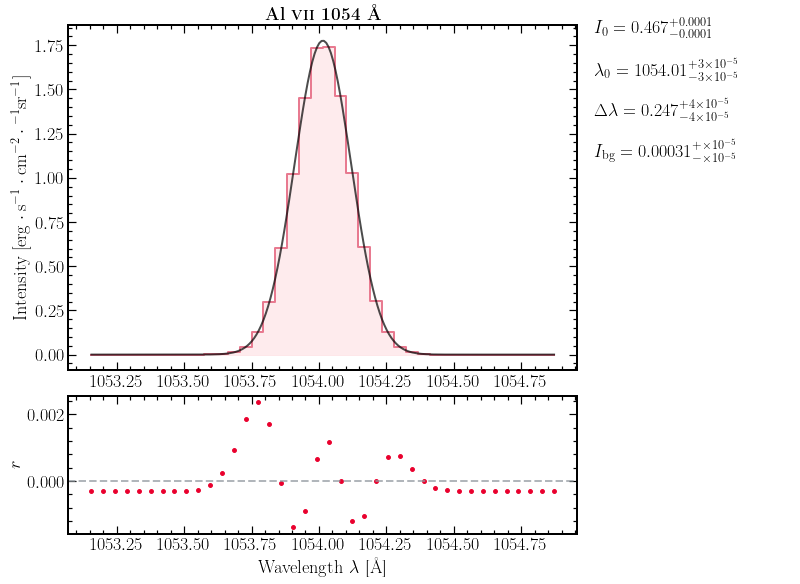

In [22]:
AlVII_1054_slice = (980,1020)
wvl_AlVII_1054 = wvl[AlVII_1054_slice[0]:AlVII_1054_slice[1]]
int_AlVII_1054 = np.average(syn_spec[6:9,AlVII_1054_slice[0]:AlVII_1054_slice[1]],axis=0)

AlVII_1054_fit_model = SpectrumFitSingle(data=int_AlVII_1054,wvl=wvl_AlVII_1054,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[1053.9],
                                      int_max_init=[3],fwhm_init=[0.2])
# AlVII_1054_fit_model.plot(plot_fit=False,plot_params=False)
AlVII_1054_fit_model.run_HahnMC(n_chain=10000)
AlVII_1054_fit_model.plot(plot_title=r"\textbf{Al \textsc{vii} 1054 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg \cdot s^{-1} \cdot cm^{-2} \cdot \AA^{-1} sr^{-1}]}$")